# Monitoring of payment's deadlines

### what this code do:
- gets a database of clients
- calculates whether the fine has expired
- writes a email for each client saying: (expire in 'n' days) OR (expired 'n' days ago + fine price)
- **PLUS: [Statistics](#statistics) about clients in debt**

In [154]:
def deadline(day, month, year):
    
    date = datetime.date.today()

    if year < date.year:
        return True
    elif year > date.year:
        return False
    elif month < date.month:
        return True 
    elif month > date.month:
        return False
    elif day < date.day:
        return True 
    elif day >= date.day:
        return False

def calc_debt(value, days_delayed):
    total = value * (1 + 0.02 + (days_delayed * 0.00016))
    return total - value

In [155]:
import pandas as pd
import datetime 

In [156]:
# client data
names = ['Anna', 'Peter', 'John', 'Dave', 'Jessie', 'James', 'Maarshall', 'Barney', 'Amy', 'Sophie', 'Nicolas']
domain = "@gmail.com"
email_list = [name.lower() + domain for name in names]
value = 1800

new_row = {'client_id': ['123', '456', '789', '101', '112', '131', '415', '161', '718', '192', '221'], 'client_name': names, 'expire_date': ['01/03/2023', '03/09/2023', '05/12/2023', '06/11/2023', '07/02/2023', '09/03/2023', '22/04/2023', '28/11/2022', '24/05/2023', '18/07/2023', '17/10/2023'], 'value': value, 'email': email_list}

In [157]:
df = pd.DataFrame(data=new_row)
df

,client_id,client_name,expire_date,value,email
0,123,Anna,01/03/2023,1800,anna@gmail.com
1,456,Peter,03/09/2023,1800,peter@gmail.com
2,789,John,05/12/2023,1800,john@gmail.com
3,101,Dave,06/11/2023,1800,dave@gmail.com
4,112,Jessie,07/02/2023,1800,jessie@gmail.com
5,131,James,09/03/2023,1800,james@gmail.com
6,415,Maarshall,22/04/2023,1800,maarshall@gmail.com
7,161,Barney,28/11/2022,1800,barney@gmail.com
8,718,Amy,24/05/2023,1800,amy@gmail.com
9,192,Sophie,18/07/2023,1800,sophie@gmail.com


In [158]:
# optional data input

#j = int(input('adding clients (number): '))

#for i in range(j):
#    id = input('id: ')
#    name = input('name: ')
#    expire_date = input('expire(dd/mm/yyyy): ')
#    email = input('email: ')
#
#
#    new_row = {'client_id': id, 'client_name': name, 'expire_date': expire_date, 'value': value, 'email': email}
#    df = df.append(new_row, ignore_index=True)
#
#print(df)

In [159]:
df['expire_date'] = pd.to_datetime(df['expire_date'], format='%d/%m/%Y')

days = pd.DatetimeIndex(df['expire_date']).day
months = pd.DatetimeIndex(df['expire_date']).month
years = pd.DatetimeIndex(df['expire_date']).year
date = pd.to_datetime(datetime.date.today())


In [160]:
for i in range(len(df)):
    date = pd.to_datetime(datetime.date.today())

    d = pd.to_numeric(days[i])
    m = pd.to_numeric(months[i])
    y = pd.to_numeric(years[i])

    email = df.loc[i, 'email']
    deadline_date = pd.to_datetime(df.loc[i, 'expire_date'], format='%d/%m/%Y')

    term = (date - deadline_date)

    if (deadline(d, m, y)):
        days_delayed = (date - deadline_date)

        debt = float(calc_debt(value, days_delayed.days))
        df.loc[i, 'debt'] = multa 
        df.loc[i, 'situation'] = 'In debt'

        print(f'{email}: Your title has expired for {int(days_delayed.days)} days, with an accumulated value of: R${float(debt):.2f}.\n\n')

    else:
        dias_atraso = 0
        df.loc[i, 'debt'] = 0
        df.loc[i, 'situation'] = 'Up to date'

        print(f'{email}: Your title is expiring in {abs(term.days)} days.\n')
        
        

anna@gmail.com: Your title has expired for 30 days, with an accumulated value of: R$44.64.


peter@gmail.com: Your title is expiring in 156 days.

john@gmail.com: Your title is expiring in 249 days.

dave@gmail.com: Your title is expiring in 220 days.

jessie@gmail.com: Your title has expired for 52 days, with an accumulated value of: R$50.98.


james@gmail.com: Your title has expired for 22 days, with an accumulated value of: R$42.34.


maarshall@gmail.com: Your title is expiring in 22 days.

barney@gmail.com: Your title has expired for 123 days, with an accumulated value of: R$71.42.


amy@gmail.com: Your title is expiring in 54 days.

sophie@gmail.com: Your title is expiring in 109 days.

nicolas@gmail.com: Your title is expiring in 200 days.



## Some statistics: <a id='statistics'></a>

In [161]:
debt = df.drop(df[df['debt'] == 0].index)
#tabela dos 'vencedores'
pivot = debt.pivot_table(index='client_name', values='debt')
pivot = pivot.rename_axis('debtor name')
print(pivot)

print()
in_debt = len(df[df['debt'] > 0])
print(f'in debt: {in_debt}')
regular = len(names) - in_debt
print(f'regular: {regular}')

               debt
debtor name        
Anna         71.424
Barney       71.424
James        71.424
Jessie       71.424

in debt: 4
regular: 7


<AxesSubplot:>

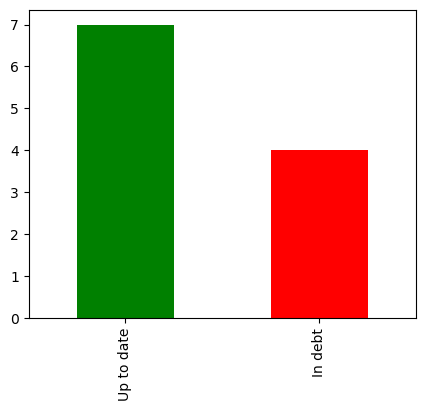

In [162]:
import matplotlib.pyplot as plt
df['situation'].value_counts().plot(kind='bar', color=['green', 'red'], figsize=(5, 4))

made by nicolas, inspired by a college work that i saw opportunity to upgrade and come closer to practical reality
- github: https://github.com/nlg18
- linkedin: https://www.linkedin.com/in/nicolas-leite-4b088a268/